# 1. 匯入套件

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 2. 資料前處理

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 圖片像素值正規化
    rotation_range=40,  # 隨機旋轉圖片
    width_shift_range=0.2,  # 隨機水平偏移
    height_shift_range=0.2,  # 隨機垂直偏移
    shear_range=0.2,  # 剪切變換
    zoom_range=0.2,  # 隨機縮放
    horizontal_flip=True,  # 隨機水平翻轉
    fill_mode='nearest'  # 填充空白區域
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    'dataset/train',  # 訓練數據路徑
    target_size=(224, 224),  # 調整圖片大小
    batch_size=32,  # 每次訓練的圖片數
    class_mode='categorical'  # 類別模式（多類別分類）
)

validation_generator = test_datagen.flow_from_directory(
    'dataset/validation',  # 驗證數據路徑
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 207 images belonging to 4 classes.
Found 37 images belonging to 4 classes.


# 3. 訓練模型

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # 輸出層
])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 999ms/step - accuracy: 0.3216 - loss: 3.0647 - val_accuracy: 0.2500 - val_loss: 1.8589
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4688 - loss: 1.4156 - val_accuracy: 0.4000 - val_loss: 1.5284
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 750ms/step - accuracy: 0.4740 - loss: 1.2065
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5000 - loss: 1.1490 - val_accuracy: 0.2500 - val_loss: 1.4604
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 833ms/step - accuracy: 0.4821 - loss: 1.1761 - val_accuracy: 0.6000 - val_loss: 1.0932
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3750 - loss: 1.1901  
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 0.4271 - loss: 1.1750 - val_accuracy: 0.2500 - val_loss: 1.4018
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 1.0384 - val_accuracy: 0.4000 - val_loss: 1.0468
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 860ms/step - accuracy: 0.4690 - loss: 1.1

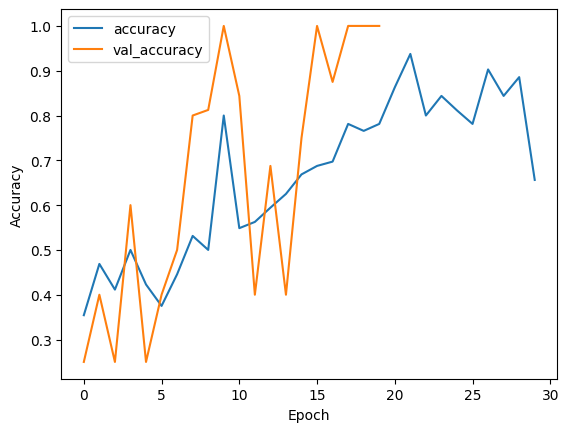

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 4. 儲存模型

In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model

old_model = load_model('RecyclingModel.h5')

old_model_accuracy = old_model.evaluate(validation_generator)[1]  # 取得舊模型的驗證準確率
new_model_accuracy = history.history['val_accuracy'][-1]  # 取得新模型的最後一輪驗證準確率

print(f"Old model accuracy: {old_model_accuracy}")
print(f"New model accuracy: {new_model_accuracy}")

# if new_model_accuracy > old_model_accuracy:
#     print("保存新模型")
#     model.save('RecyclingModel.h5')  # 保存新模型
# else:
#     print("保存舊模型")
#     old_model.save('RecyclingModel.h5')  # 保存舊模型

model.save('RecyclingModel.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0528 


Old model accuracy: 1.0
New model accuracy: 1.0
